In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from citipy import citipy

import json
import requests
from api_keys import weather_api_key

In [2]:
lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.00, size=1500)

lat_lngs = zip(lats,lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

len(cities)

587

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}&appid={weather_api_key}&units={units}&q=Phoenix"
response = requests.get(query_url).json()

print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 33.45,
        "lon": -112.07
    },
    "dt": 1579728111,
    "id": 5308655,
    "main": {
        "feels_like": 59.25,
        "humidity": 63,
        "pressure": 1019,
        "temp": 62.01,
        "temp_max": 66,
        "temp_min": 57.99
    },
    "name": "Phoenix",
    "sys": {
        "country": "US",
        "id": 5347,
        "sunrise": 1579703404,
        "sunset": 1579740548,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 16093,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "speed": 4.7
    }
}


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}&appid={weather_api_key}&units={units}&q="

name = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
latitude = []
longitude = []

city_count = 0

for city in cities:
    
    response = requests.get(query_url + city).json()
    
    try:
        name.append(response["name"])
        temperature.append(response["main"]["temp"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        
        city_count = city_count + 1
        print(f'{city_count} {city}')
    
    except:
        print("City not found")
        pass

coords = zip(latitude,longitude)

City not found
1 iranshahr
2 kibre mengist
3 east london
4 port alfred
5 koidu
6 cabo san lucas
7 bredasdorp
8 mataura
9 cape town
City not found
10 yugorsk
City not found
11 pevek
City not found
12 yellowknife
13 de-kastri
14 carnarvon
15 souillac
16 luderitz
17 khani
18 changde
19 rikitea
20 dudinka
21 port elizabeth
22 arraial do cabo
23 general cepeda
24 san patricio
City not found
25 matai
26 albany
27 punta arenas
28 aklavik
29 ushuaia
30 coquimbo
31 hobart
32 ribeira grande
33 kismayo
34 jamestown
35 chokurdakh
36 tyn nad vltavou
37 chuy
38 verkhoyansk
39 klaksvik
40 cap malheureux
41 kalmunai
42 cidreira
43 bluff
44 mahebourg
45 samarai
46 maryville
47 tiznit
48 rorvik
49 mbulu
50 busselton
51 tasiilaq
City not found
52 huilong
53 ancud
54 licheng
55 bambous virieux
56 angoram
57 gamba
58 airai
59 santa rosa
60 naze
61 coruripe
62 kapaa
63 esil
64 surt
65 kendari
City not found
66 khvoynaya
67 hilo
68 lorengau
69 altus
70 kaitangata
71 chihuahua
72 kudahuvadhoo
73 kavieng
74 al

In [13]:
weather_dict = {
    
    'city': name,
    'temperature': temperature,
    'humidity': humidity,
    'cloudiness': cloudiness,
    'wind speed': wind_speed,
    'latitude': latitude,
    'longitude': longitude
}

weather_data = pd.DataFrame(weather_dict)
weather_data

,city,temperature,humidity,cloudiness,wind speed,latitude,longitude
0,Iranshahr,17.00,59,61,2.10,27.20,60.68
1,Kibre Mengist,14.97,52,100,1.09,5.88,38.98
2,East London,21.75,72,100,4.80,-33.02,27.91
3,Port Alfred,17.22,97,100,0.89,-33.59,26.89
4,Koidu,24.85,67,99,0.30,8.42,-10.83
...,...,...,...,...,...,...,...
539,Phan Thiet,18.76,90,0,1.41,10.93,108.10
540,Sola,27.30,71,83,6.68,-13.88,167.55
541,Saint-Augustin,-6.98,91,95,3.55,51.23,-58.65
542,Plettenberg Bay,18.14,84,54,4.16,-34.05,23.37


In [14]:
s_hem_df = weather_data.loc[weather_data["latitude"] < 0]
s_hem_df

,city,temperature,humidity,cloudiness,wind speed,latitude,longitude
2,East London,21.75,72,100,4.80,-33.02,27.91
3,Port Alfred,17.22,97,100,0.89,-33.59,26.89
6,Bredasdorp,16.69,93,0,2.10,-34.53,20.04
7,Mataura,16.11,78,99,6.26,-46.19,168.86
8,Cape Town,19.90,49,0,5.70,-33.93,18.42
...,...,...,...,...,...,...,...
533,Itupiranga,29.00,74,75,1.00,-5.13,-49.33
536,Opuwo,23.12,40,12,4.41,-18.06,13.84
537,Beira,27.20,70,53,5.45,-19.84,34.84
540,Sola,27.30,71,83,6.68,-13.88,167.55


In [15]:
n_hem_df = weather_data.loc[weather_data["latitude"] >= 0]
n_hem_df

,city,temperature,humidity,cloudiness,wind speed,latitude,longitude
0,Iranshahr,17.00,59,61,2.10,27.20,60.68
1,Kibre Mengist,14.97,52,100,1.09,5.88,38.98
4,Koidu,24.85,67,99,0.30,8.42,-10.83
5,Cabo San Lucas,23.51,57,40,4.60,22.89,-109.91
9,Yugorsk,-7.67,94,100,4.21,61.31,63.33
...,...,...,...,...,...,...,...
535,Rathkeale,7.90,93,90,1.50,52.52,-8.94
538,Qasigiannguit,-10.00,78,90,7.20,68.82,-51.19
539,Phan Thiet,18.76,90,0,1.41,10.93,108.10
541,Saint-Augustin,-6.98,91,95,3.55,51.23,-58.65


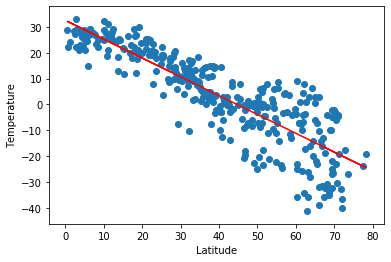

In [16]:
n_hem_temp_columns = n_hem_df[["city", "temperature", "latitude"]]
n_hem_temp_columns.plot(kind="scatter", x="latitude", y="temperature")

x_values = n_hem_temp_columns["latitude"]
y_values = n_hem_temp_columns["temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

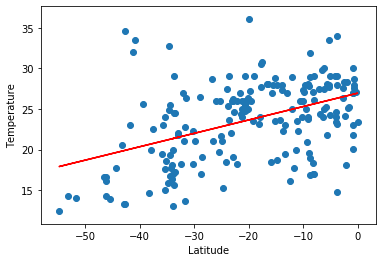

In [17]:
s_hem_temp_columns = s_hem_df[["city", "temperature", "latitude"]]
s_hem_temp_columns.plot(kind="scatter", x="latitude", y="temperature")

x_values = s_hem_temp_columns["latitude"]
y_values = s_hem_temp_columns["temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

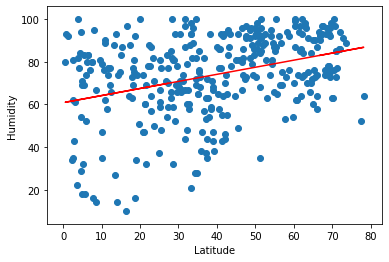

In [18]:
n_hem_hum_columns = n_hem_df[["city", "humidity", "latitude"]]
n_hem_hum_columns.plot(kind="scatter", x="latitude", y="humidity")

x_values = n_hem_hum_columns["latitude"]
y_values = n_hem_hum_columns["humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

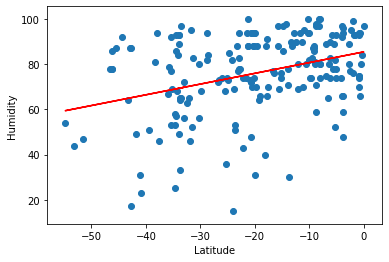

In [19]:
s_hem_hum_columns = s_hem_df[["city", "humidity", "latitude"]]
s_hem_hum_columns.plot(kind="scatter", x="latitude", y="humidity")

x_values = s_hem_hum_columns["latitude"]
y_values = s_hem_hum_columns["humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

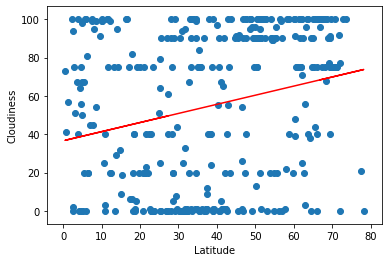

In [20]:
n_hem_cloud_columns = n_hem_df[["city", "cloudiness", "latitude"]]
n_hem_cloud_columns.plot(kind="scatter", x="latitude", y="cloudiness")

x_values = n_hem_cloud_columns["latitude"]
y_values = n_hem_cloud_columns["cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

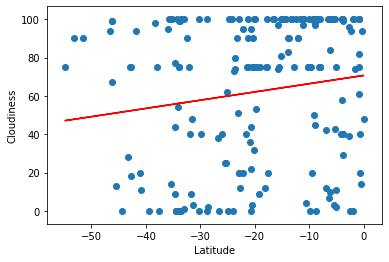

In [21]:
s_hem_cloud_columns = s_hem_df[["city", "cloudiness", "latitude"]]
s_hem_cloud_columns.plot(kind="scatter", x="latitude", y="cloudiness")

x_values = s_hem_cloud_columns["latitude"]
y_values = s_hem_cloud_columns["cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

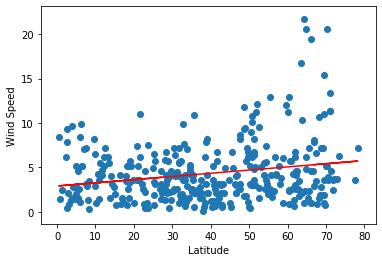

In [22]:
n_hem_wind_columns = n_hem_df[["city", "wind speed", "latitude"]]
n_hem_wind_columns.plot(kind="scatter", x="latitude", y="wind speed")

x_values = n_hem_wind_columns["latitude"]
y_values = n_hem_wind_columns["wind speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

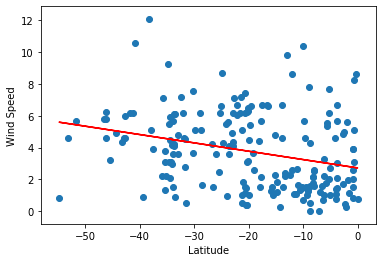

In [23]:
s_hem_wind_columns = s_hem_df[["city", "wind speed", "latitude"]]
s_hem_wind_columns.plot(kind="scatter", x="latitude", y="wind speed")

x_values = s_hem_wind_columns["latitude"]
y_values = s_hem_wind_columns["wind speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

In [25]:
weather_data.to_csv("Files/WeatherData.csv", index=False, header=True)